In [1]:
#!python3 -m pip install statsmodels 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/titanic/train.csv',  index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#agemeans = df.groupby(['Pclass','Sex'])['Age'].mean()
# df[(df['Pclass']==1) & (df['Sex']=='female')].fillna(agemeans.loc[(1, 'female')], inplace=True)

In [5]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [7]:
Xtrain = Xtrain.copy()
Xtest = Xtest.copy()

### Feature Engineering

In [8]:
def feature_engineering(X, agemean):
    """adds extra features to a DataFrame"""
    X['Age'].fillna(agemean, inplace=True)
    X['female'] = pd.factorize(X['Sex'])[0]
    X['child'] = (X['Age'] < 14).astype(int)
    X['female_pclass'] = X['female']       * X['Pclass']
    X['male_pclass']   = (1 - X['female']) * X['Pclass']
    X['child_pclass']  = X['child']        * X['Pclass']
    X['adult_pclass']  = (1 - X['child'])  * X['Pclass']

In [9]:
agemean = Xtrain['Age'].mean()
feature_engineering(Xtrain, agemean)
feature_engineering(Xtest, agemean)  # use training mean to avoid 'data leakage' in .mean()

### LogReg Model

In [10]:
X = Xtrain.copy()
del X['Sex']

In [11]:
Xt = Xtest.copy()
del Xt['Sex']

In [12]:
m = LogisticRegression()
cross_val_score(m, X, ytrain, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.82222222, 0.81343284, 0.78947368, 0.79699248, 0.76691729])

In [13]:
m.fit(X, ytrain)
m.score(X, ytrain)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8053892215568862

In [14]:
m.score(Xt, ytest)

0.8475336322869955

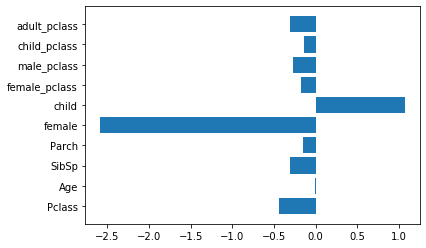

In [15]:
plt.barh(range(10), m.coef_[0])
plt.yticks(range(10), X.columns)
None

In [16]:
import statsmodels.api as sm
logit = sm.Logit(ytrain, X)
f = logit.fit(maxiter=300)
print(f.params)
print('-' * 40)
print(f.summary())

         Current function value: 0.500516
         Iterations: 300
Pclass          -0.627611
Age              0.035482
SibSp           -0.172215
Parch           -0.200197
female          -1.335488
child            7.479272
female_pclass   -0.526342
male_pclass     -0.101172
child_pclass    -1.237113
adult_pclass     0.609684
dtype: float64
----------------------------------------
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  668
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                            7
Date:                Mon, 29 Jul 2019   Pseudo R-squ.:                  0.2527
Time:                        11:51:56   Log-Likelihood:                -334.34
converged:                      False   LL-Null:                       -447.38
Covariance Type:            nonrobust   LLR p-value:            

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### RF Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=20, max_depth=2)
cross_val_score(m, X, ytrain, cv=5, scoring='accuracy')

array([0.82222222, 0.79850746, 0.78195489, 0.76691729, 0.7518797 ])

In [18]:
m.fit(X, ytrain)
m.score(X, ytrain)

0.7754491017964071

In [19]:
m.score(Xt, ytest)

0.8251121076233184

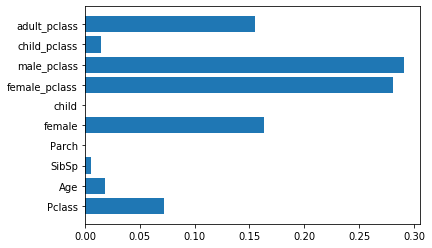

In [20]:
plt.barh(range(10), m.feature_importances_)
plt.yticks(range(10), X.columns)
None

In [21]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'female', 'child', 'female_pclass',
       'male_pclass', 'child_pclass', 'adult_pclass'],
      dtype='object')